In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("data (1).csv")

# Display first 5 rows
df.head()


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [3]:
# Display basic information about the dataset
print("Dataset Info:")
df.info()
print("\nFirst 5 rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB

First 5 rows:
   footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0         0         7   7    1   6    6  36   3            1     1
1       190         1   3    3   5    1  20   4            1     0
2        31         7   2    2   6    1  24   6            1     0
3        83         4   3    4   5    1  28   6            1     0
4       640

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
footfall       0
tempMode       0
AQ             0
USS            0
CS             0
VOC            0
RP             0
IP             0
Temperature    0
fail           0
dtype: int64


In [9]:
# Ensure that Matplotlib and Seaborn are properly used
if 'plt' not in globals():
    import matplotlib.pyplot as plt
if 'sns' not in globals():
    import seaborn as sns

/var/folders/vt/zt5vyg9950lfsmqs1vwwjnzr0000gn/T/ipykernel_78670/1599882577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['fail'], palette='coolwarm')


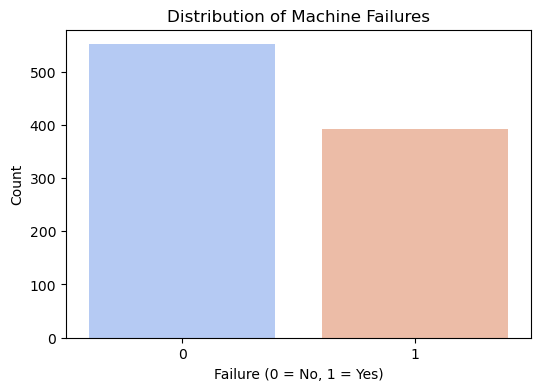

In [11]:
# Analyze the distribution of machine failures
plt.figure(figsize=(6,4))
sns.countplot(x=df['fail'], palette='coolwarm')
plt.title("Distribution of Machine Failures")
plt.xlabel("Failure (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

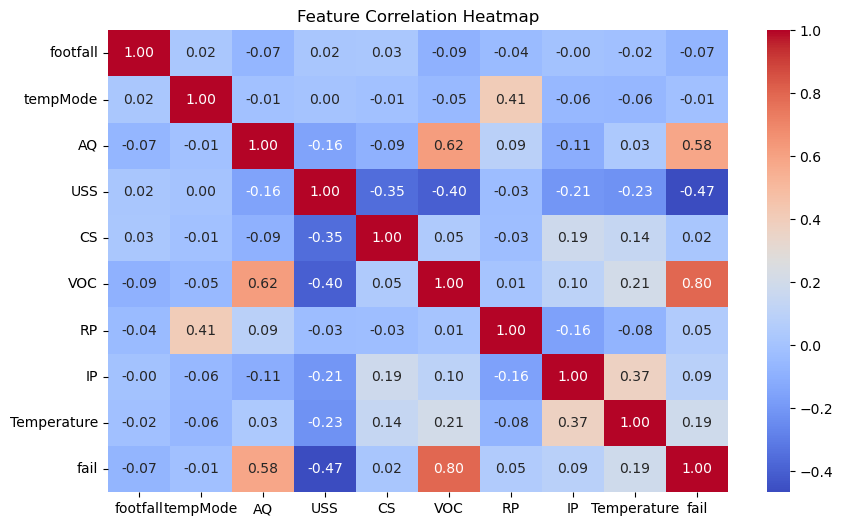

In [13]:
# Compute and visualize correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

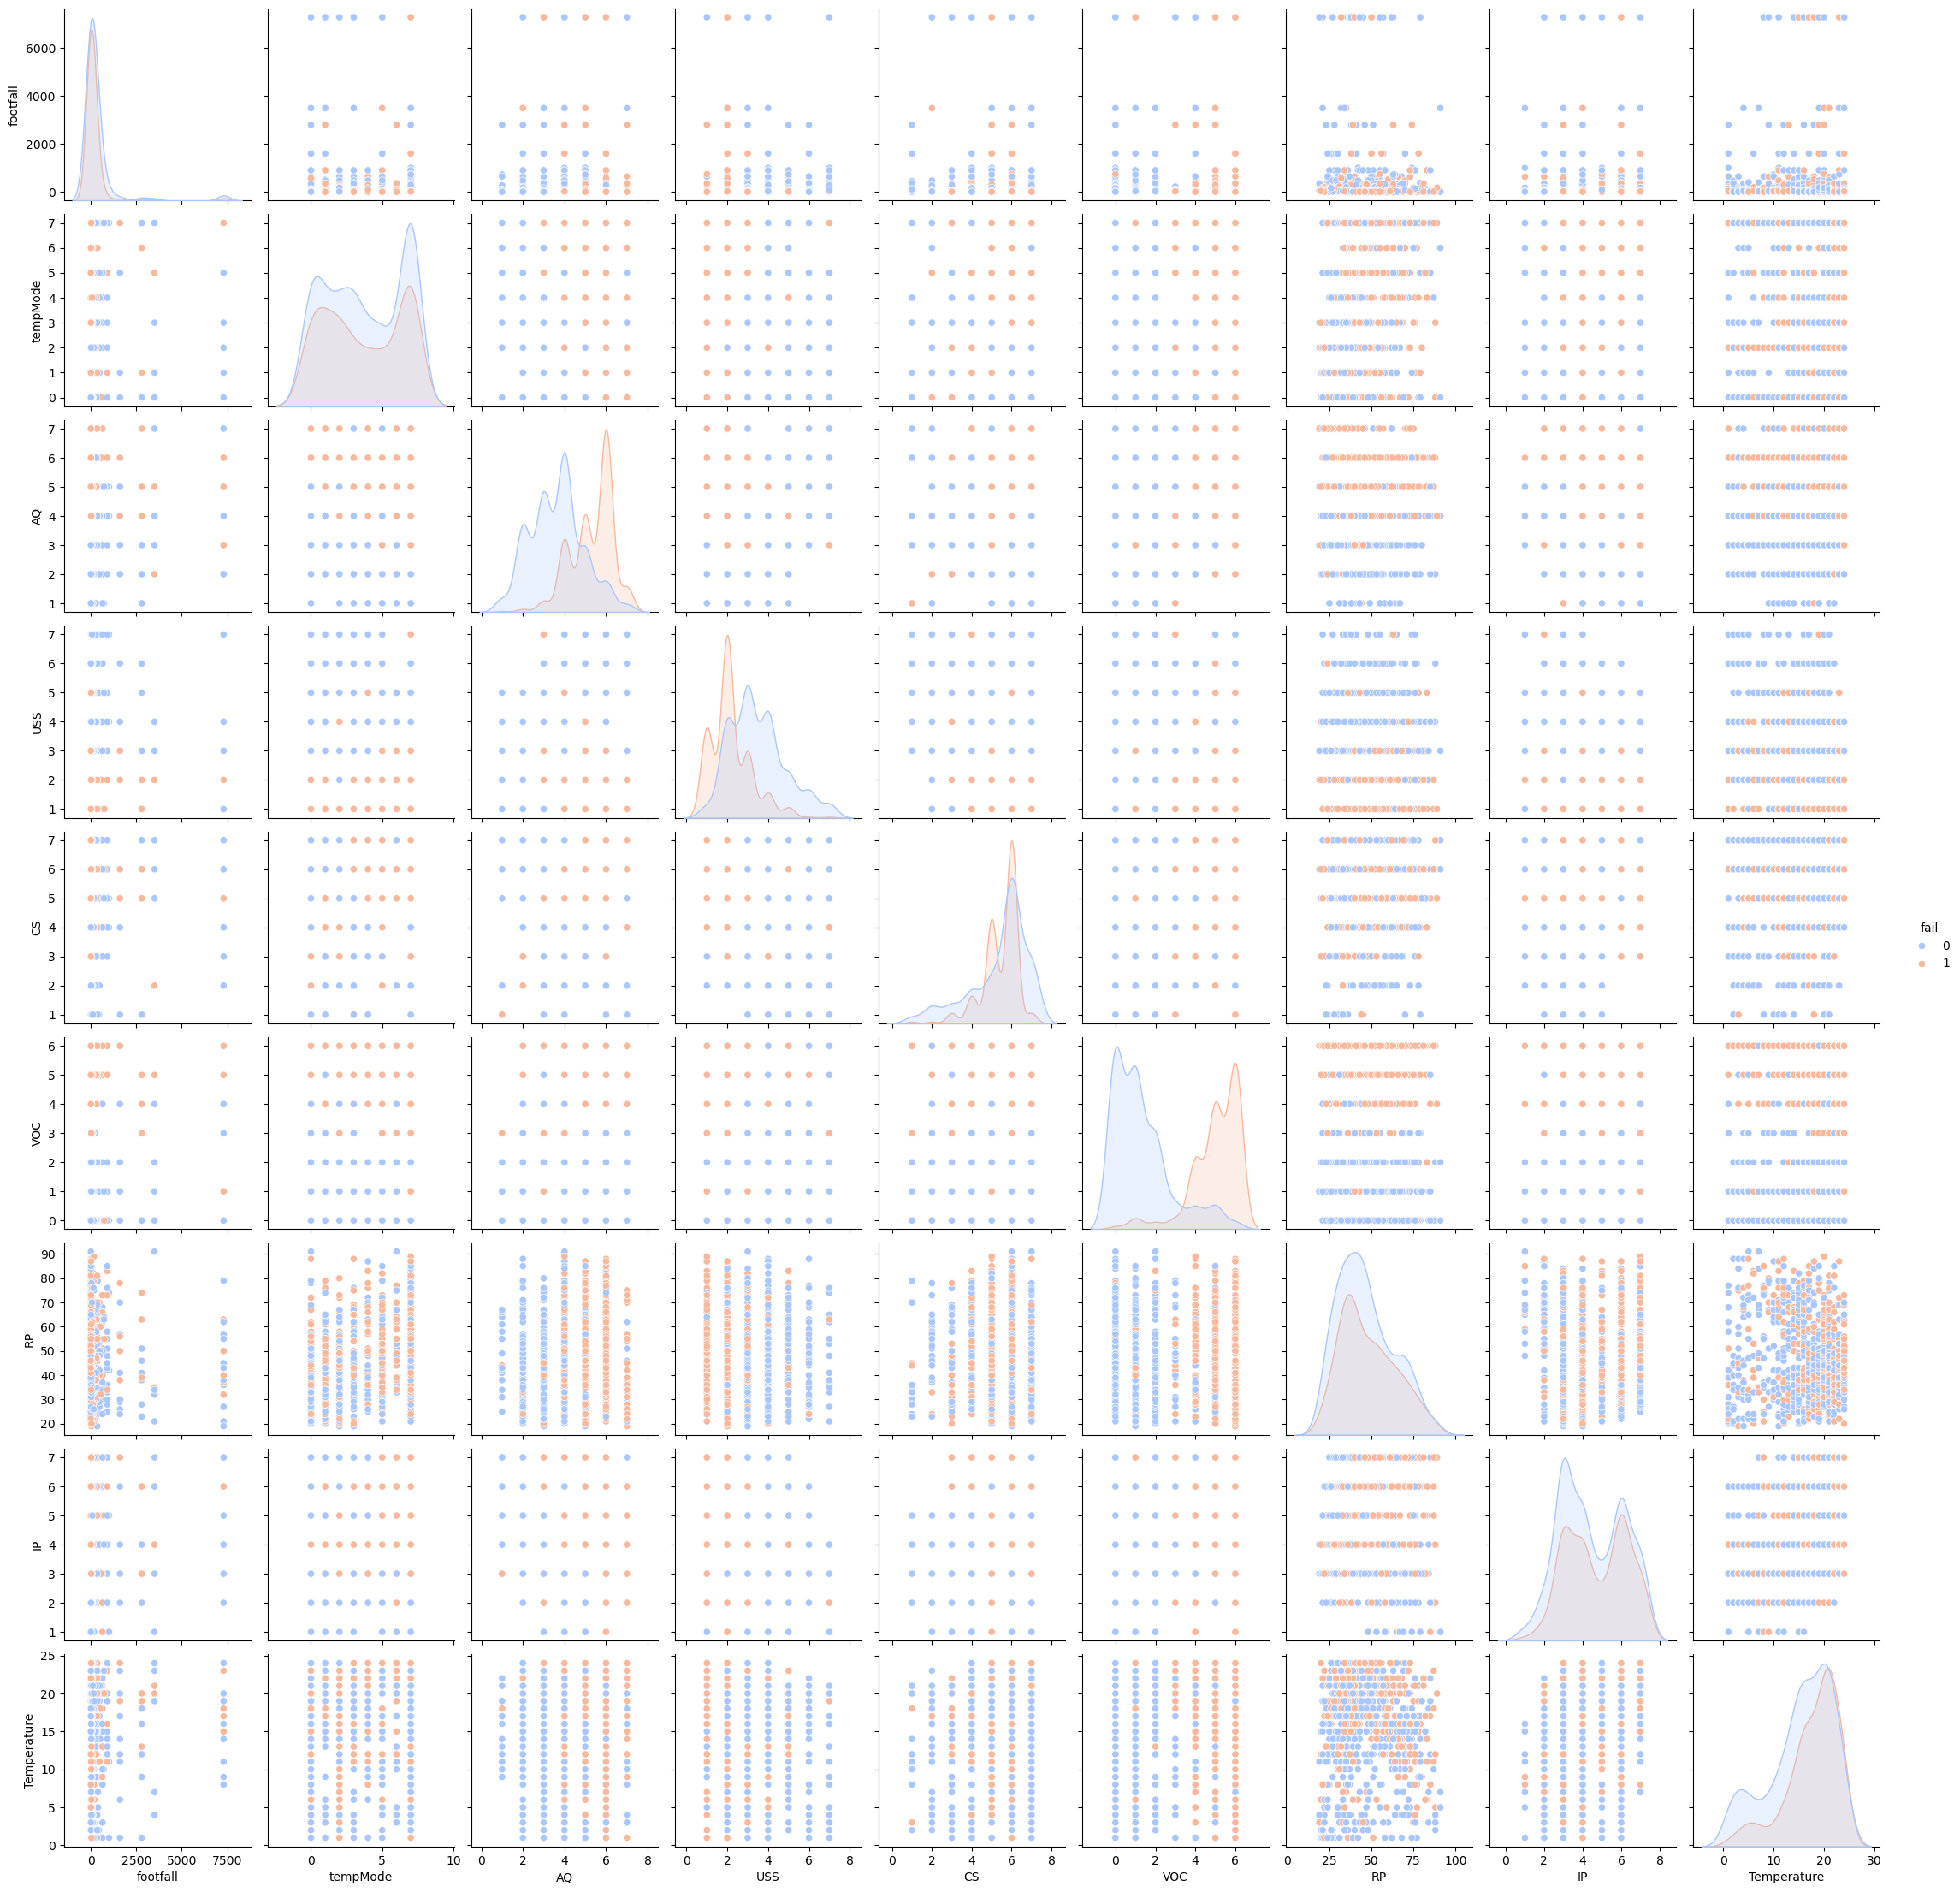

In [15]:
# Pairplot for visualizing relationships
sns.pairplot(df, hue='fail', palette='coolwarm')
plt.show()

In [17]:
print("\nBasic Statistics:")
print(df.describe())



Basic Statistics:
          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              VOC          RP          IP  Temperature        fail  
count  944.000000  944.000000  944.000000   944.000000  944.000000  
mean     2.842161   47.043432    4.565678    16.331568    0.416314  
std      2.273337   16.423130    1.599287     5.974781    0.493208  
min      0.000000   19.000000    1.000000     1.000000    0.000000  
25%  

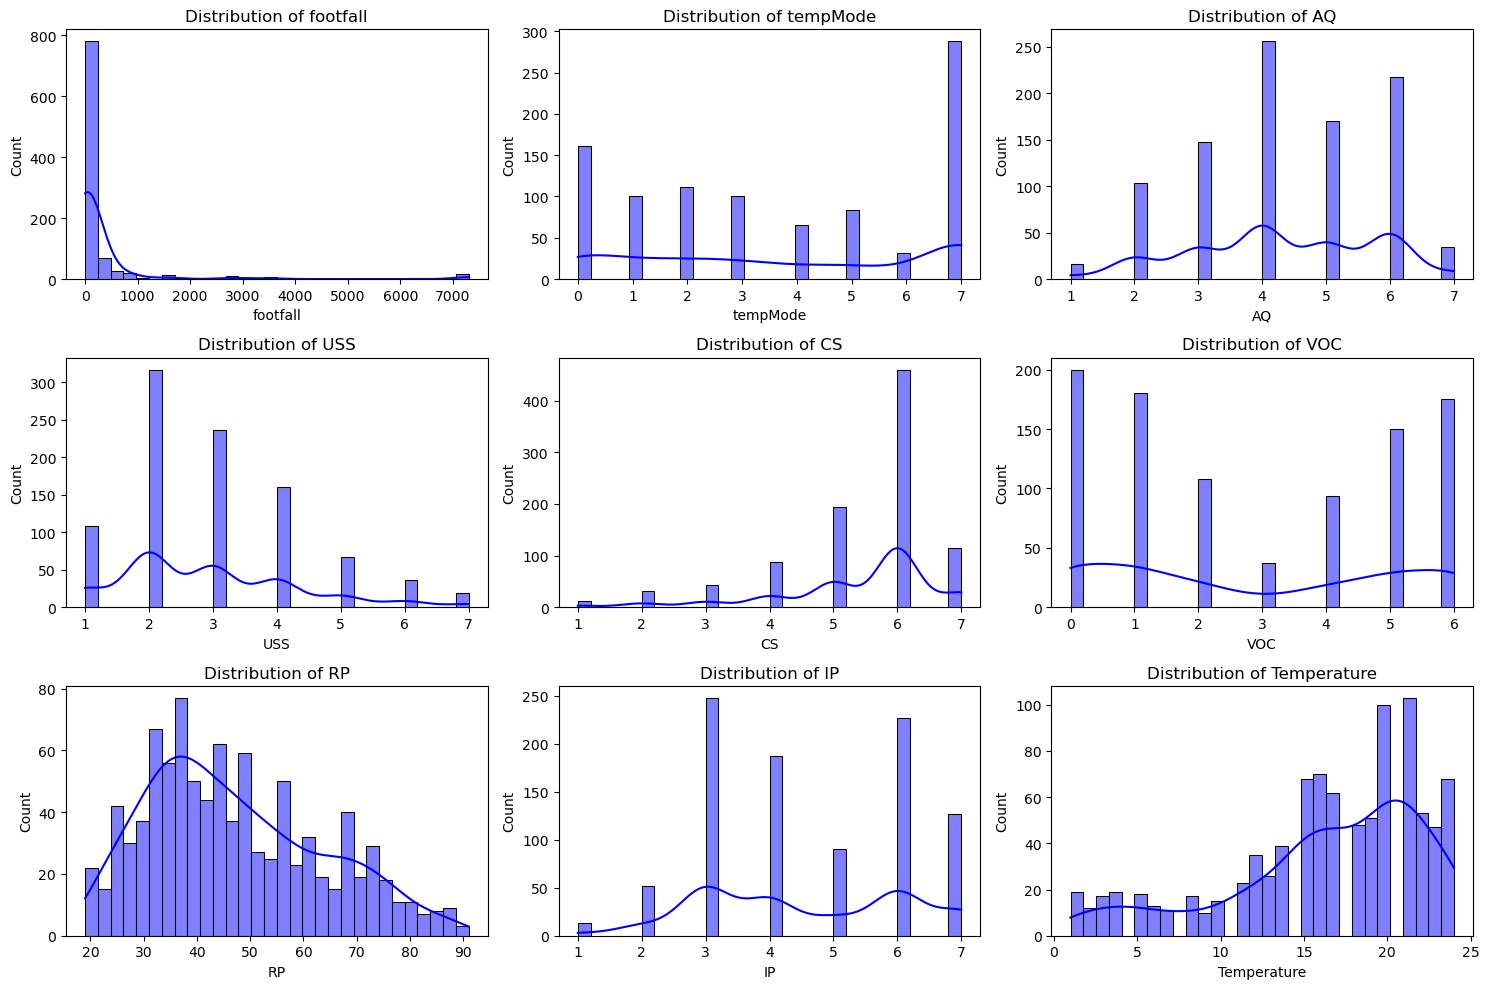

In [19]:
# Visualizing individual feature distributions
features = ['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']
plt.figure(figsize=(15,10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], bins=30, kde=True, color='blue')
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

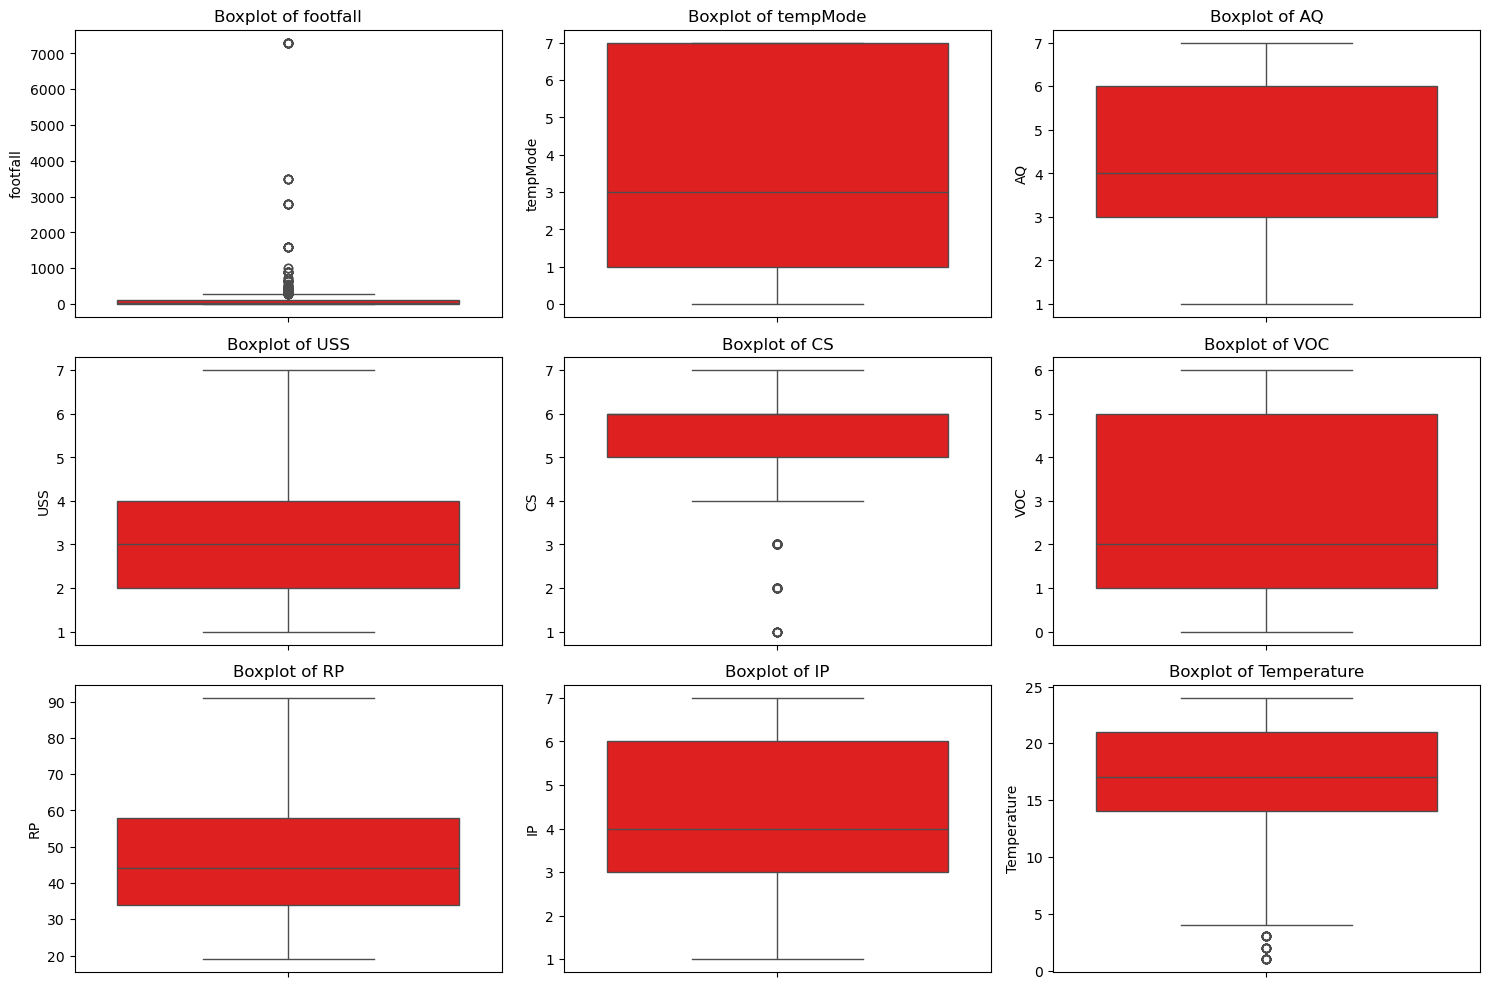

In [21]:
# Boxplots to detect outliers
plt.figure(figsize=(15,10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[feature], color='red')
    plt.title(f"Boxplot of {feature}")
plt.tight_layout()
plt.show()


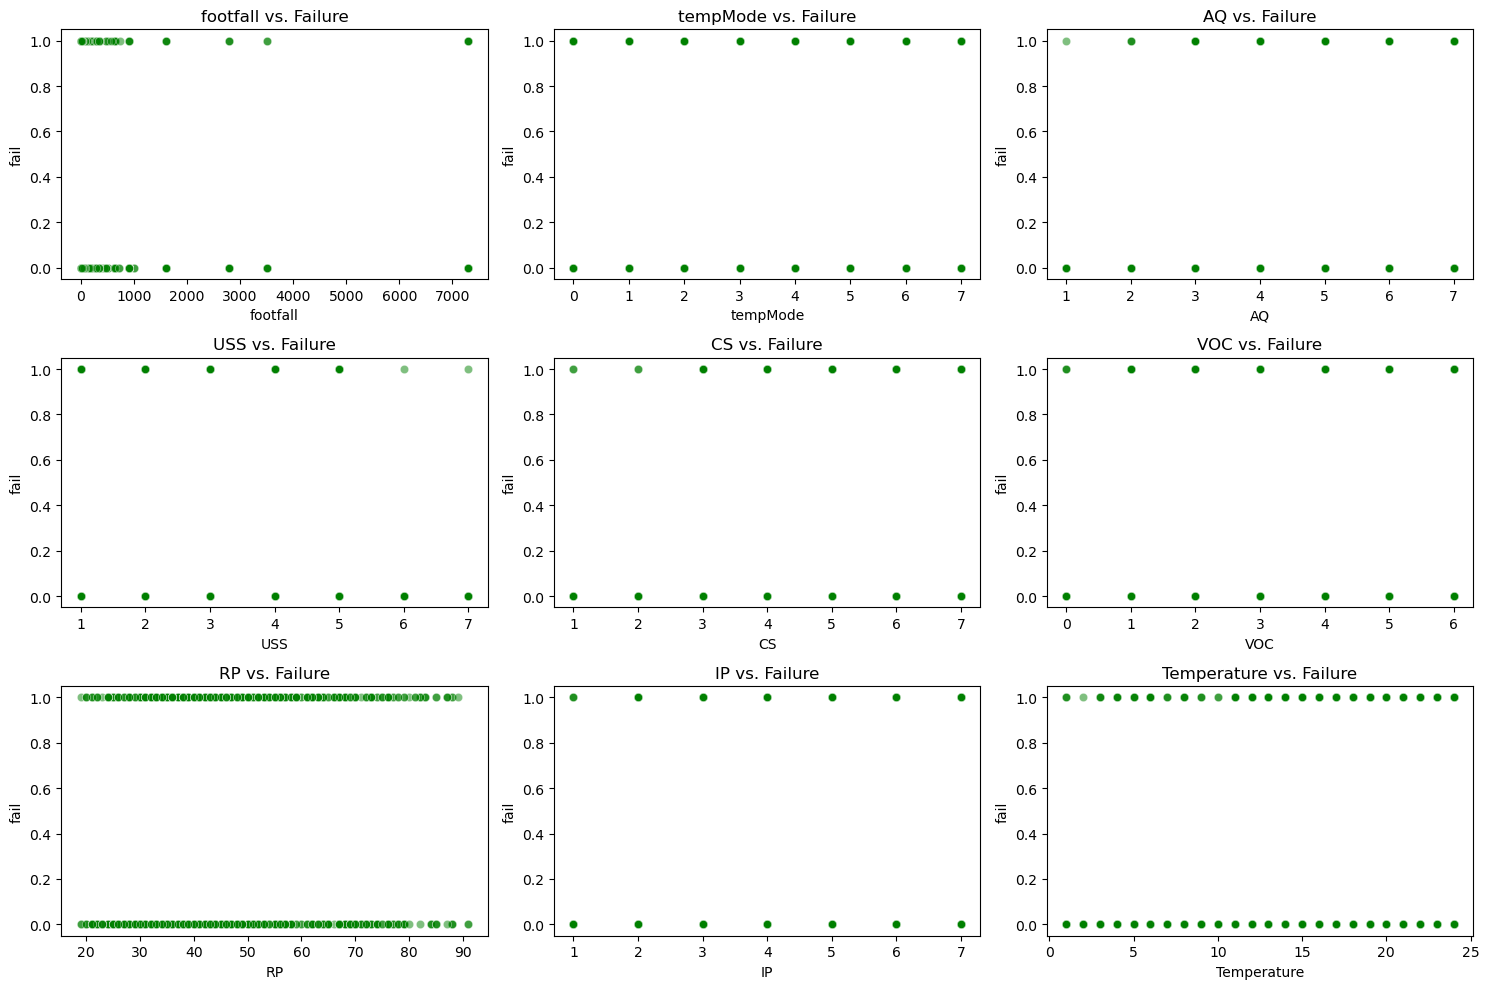

In [23]:
# Scatter plots for feature relationships
plt.figure(figsize=(15,10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[feature], y=df['fail'], alpha=0.5, color='green')
    plt.title(f"{feature} vs. Failure")
plt.tight_layout()
plt.show()

In [27]:
# Ensure necessary libraries are imported
if 'train_test_split' not in globals():
    from sklearn.model_selection import train_test_split

In [69]:
# Prepare data for machine learning
X = df.drop(columns=['fail'])
y = df['fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Ensure necessary libraries are imported
if 'train_test_split' not in globals():
    from sklearn.model_selection import train_test_split
if 'RandomForestClassifier' not in globals():
    from sklearn.ensemble import RandomForestClassifier
if 'classification_report' not in globals():
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [35]:
# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Make predictions
y_pred = model.predict(X_test)

In [39]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       102
           1       0.86      0.87      0.87        87

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189


Confusion Matrix:
[[90 12]
 [11 76]]

Accuracy Score:
0.8783068783068783


In [43]:
print("\nBasic Statistics:")
print(df.describe())



Basic Statistics:
          footfall    tempMode          AQ         USS          CS  \
count   944.000000  944.000000  944.000000  944.000000  944.000000   
mean    306.381356    3.727754    4.325212    2.939619    5.394068   
std    1082.606745    2.677235    1.438436    1.383725    1.269349   
min       0.000000    0.000000    1.000000    1.000000    1.000000   
25%       1.000000    1.000000    3.000000    2.000000    5.000000   
50%      22.000000    3.000000    4.000000    3.000000    6.000000   
75%     110.000000    7.000000    6.000000    4.000000    6.000000   
max    7300.000000    7.000000    7.000000    7.000000    7.000000   

              VOC          RP          IP  Temperature        fail  
count  944.000000  944.000000  944.000000   944.000000  944.000000  
mean     2.842161   47.043432    4.565678    16.331568    0.416314  
std      2.273337   16.423130    1.599287     5.974781    0.493208  
min      0.000000   19.000000    1.000000     1.000000    0.000000  
25%  

In [47]:
import numpy as np

/var/folders/vt/zt5vyg9950lfsmqs1vwwjnzr0000gn/T/ipykernel_78670/4056194672.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_indices], y=[feature_names[i] for i in sorted_indices], palette='viridis')


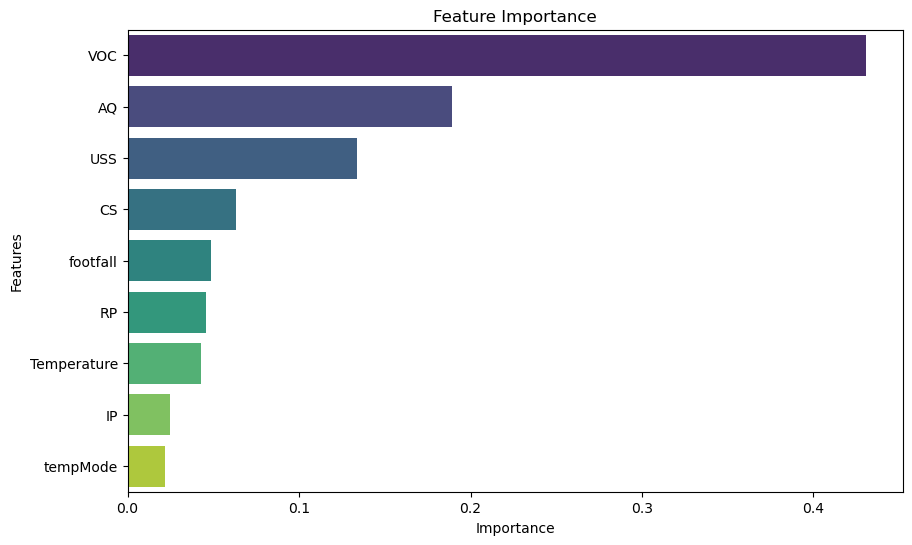

In [51]:
# Additional Evaluations
# Feature Importance
feature_importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances[sorted_indices], y=[feature_names[i] for i in sorted_indices], palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [59]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else np.zeros(len(y_test))  # Ensure y_prob is defined

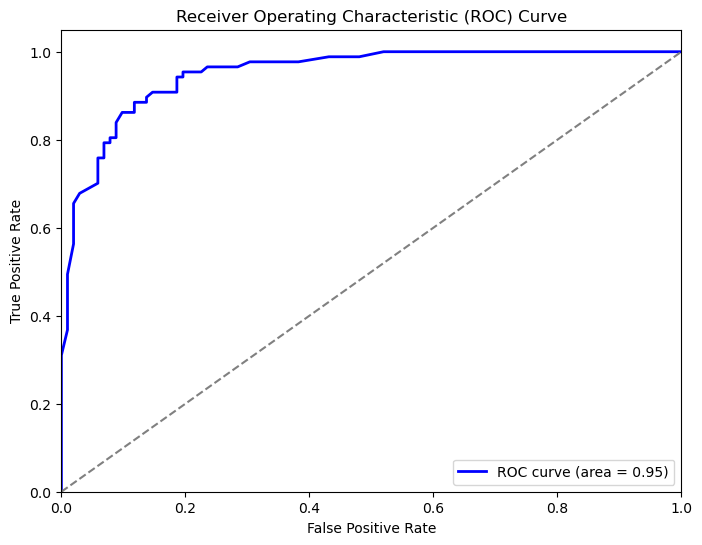

In [61]:
# ROC Curve
if len(np.unique(y_test)) > 1:  # Ensure there are positive and negative samples
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.show()
else:
    print("Skipping ROC Curve as there are not enough class variations in y_test.")


In [65]:
from sklearn.model_selection import train_test_split, cross_val_score

In [67]:
# Cross-validation score
cv_scores = cross_val_score(model, X, y, cv=5)
print("\nCross-validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Cross-validation Scores: [0.82010582 0.8994709  0.91005291 0.87301587 0.91489362]
Mean CV Score: 0.8835078239333558


In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import numpy as np
import streamlit as st


In [83]:

# Feature Engineering: Creating new features
df['temp_variation'] = df['Temperature'].diff().fillna(0)
df['pressure_temp_ratio'] = df['IP'] / (df['Temperature'] + 1e-5)

In [85]:
# Feature Scaling
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df.columns.difference(['fail'])] = scaler.fit_transform(df[df.columns.difference(['fail'])])

In [87]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(df_scaled.drop(columns=['fail']))


In [89]:
# Prepare data for ML
X = df_scaled.drop(columns=['fail'])
y = df_scaled['fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# Model Training: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [111]:
# Model Evaluation
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.89       102
           1       0.86      0.89      0.87        87

    accuracy                           0.88       189
   macro avg       0.88      0.88      0.88       189
weighted avg       0.88      0.88      0.88       189



/var/folders/vt/zt5vyg9950lfsmqs1vwwjnzr0000gn/T/ipykernel_78670/1955140058.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances[sorted_indices], y=[feature_names[i] for i in sorted_indices], palette='viridis')


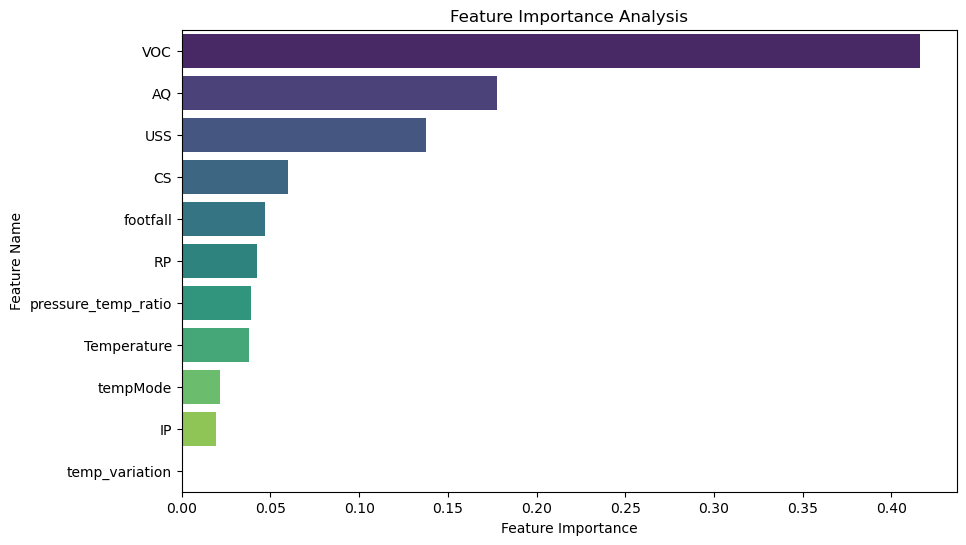

In [113]:
# Ensure model is trained before accessing feature importance
if 'rf_model' in locals():
    try:
        feature_importances = rf_model.feature_importances_
        feature_names = X.columns
        sorted_indices = np.argsort(feature_importances)[::-1]
        plt.figure(figsize=(10,6))
        sns.barplot(x=feature_importances[sorted_indices], y=[feature_names[i] for i in sorted_indices], palette='viridis')
        plt.xlabel("Feature Importance")
        plt.ylabel("Feature Name")
        plt.title("Feature Importance Analysis")
        plt.show()
    except AttributeError:
        print("Feature importance not available for the selected model.")
else:
    print("Random Forest model is not initialized correctly.")


In [115]:
# Deploy with Streamlit
def predict_failure(input_data):
    if 'rf_model' in locals():
        prediction = rf_model.predict([input_data])
        return "Failure Expected" if prediction > 0.5 else "No Failure"
    return "Model not available"

st.title("Machine Failure Prediction")
input_values = [st.number_input(col, value=0.0) for col in X.columns]
if st.button("Predict"):
    st.write(predict_failure(input_values))